In [2]:
# import required libraries/dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

import os
import shutil

In [3]:
# create the directory for storing the new dataset
!mkdir tusimple_preprocessed
!cd tusimple_preprocessed && mkdir training
!cd tusimple_preprocessed/training && mkdir frames && mkdir lane-masks

In [4]:
'''
In 'clips' directory, we get the 20th frame from each video clip
and copy the image/frame to a new directory of which path is assigned to the variable 'new_frames' below.
'''
clips = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips'
new_frames = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/training/frames'




for i in os.listdir(clips):
    for j in os.listdir(os.path.join(clips, i)):
        # get the 20th 
        
        frame = clips+'/'+i+'/'+j+'/'+'20.jpg'
        # os.path.join(clips, i, j, '20.jpg')
        print(frame)
        '''
            create a new name for each frame: here the directories' names
            e.g. 'clips/0531/1492629775931278791/20.jpg' becomes  '0531_1492629775931278791.jpg'
        '''
        tmp = frame[:-7].split('/')[-2:]
        new_fn = f'{tmp[0]}_{tmp[1]}.jpg'
        new_file = os.path.join(new_frames, new_fn)
        shutil.copy(frame, new_file)
    print('Done with: ', i)

C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips/0313-1/10000/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips/0313-1/10020/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips/0313-1/10040/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips/0313-1/10060/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips/0313-1/10080/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips/0313-1/10100/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips/0313-1/10120/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips/0313-1/10140/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/clips/0313-1/10160/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSim

In [35]:
# utils

def generate_lane_mask(row, training_set=True):
    '''
        Generates and writes the corresponding lane masks for the given images
    '''
    # create a mask of all zeros
    mask = np.zeros((720, 1280, 3))
    h_samples = row.h_samples
    lanes = row.lanes
    raw_file = row.raw_file
    
    

    # create mask: lane: 1, non-lane: 0
    for lane in lanes:    
        '''
        -2 indicates no line in the specified point, so we omit the points from lane markings list
        ''' 
        h_samples_updated = [y for x, y in zip(lane, h_samples) if x != -2]
        lane = [x for x in lane if x != -2]
        lane_points = np.array(list(zip(lane, h_samples_updated)))
        # add lane markings to the mask we created
        cv2.polylines(mask, [lane_points], False, (255, 255, 255), thickness=10)
        
        # write the lane mask to the desired directory
        if training_set:   
            path = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/training/lane-masks'
        else:
            path = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/testing/lane-masks'
        '''
            name each mask according to its image's name. 
            e.g. 'clips/0531/1492629775931278791/20.jpg' becomes '0531_1492629775931278791.jpg'
        '''
        tmp = raw_file[:-7].split('/')[-2:]
        
        mask_fname = f'{tmp[0]}_{tmp[1]}.jpg'
        
        new_file = path + "/" + mask_fname
        cv2.imwrite(new_file, mask)
    return mask_fname

In [7]:
# load the datasets: json files: label data files
df_0601 = pd.read_json('C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/label_data_0601.json', lines=True)
df_0313 = pd.read_json('C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/label_data_0313.json', lines=True)
df_0531 = pd.read_json('C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/train_set/label_data_0531.json', lines=True)
df = pd.concat([df_0601, df_0313, df_0531])

In [8]:
# generate masks based on the json files above
for index, row in df.iterrows():
    # generate the lane mask for each frame
    generate_lane_mask(row)
    if index%200 == 0:
        print('Row: ', index)

Row:  0
Row:  200
Row:  400
Row:  0
Row:  200
Row:  400
Row:  600
Row:  800
Row:  1000
Row:  1200
Row:  1400
Row:  1600
Row:  1800
Row:  2000
Row:  2200
Row:  2400
Row:  2600
Row:  2800
Row:  0
Row:  200


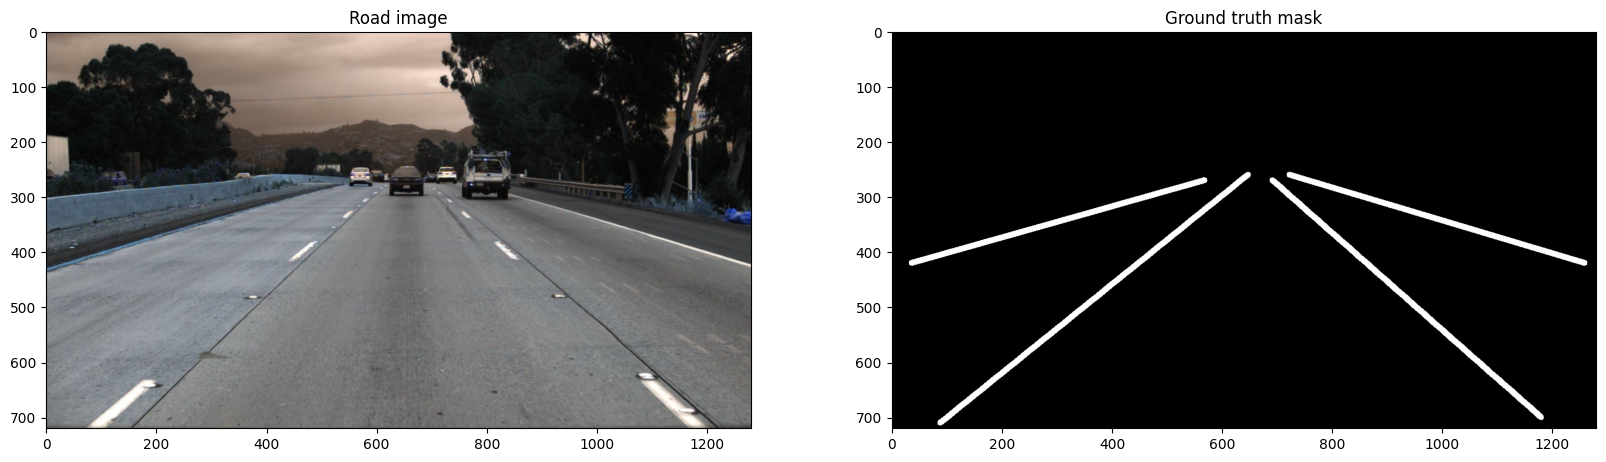

In [9]:
# visualize an example image and its corresponding lane mask
img_mask = cv2.imread('C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/training/lane-masks/0601_1494453497604532231.jpg')
img_color = cv2.imread('C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/training/frames/0601_1494453497604532231.jpg')

# training set
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.imshow(img_color/255.)
plt.title('Road image')

plt.subplot(1, 2, 2)
plt.imshow(img_mask/255., cmap='gray')
plt.title('Ground truth mask')



plt.show()

In [11]:
# check if we have the same image-mask pairs in the training set
images_path = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/training/lane-masks'
masks_path = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/training/frames'
assert os.listdir(images_path) == os.listdir(masks_path)

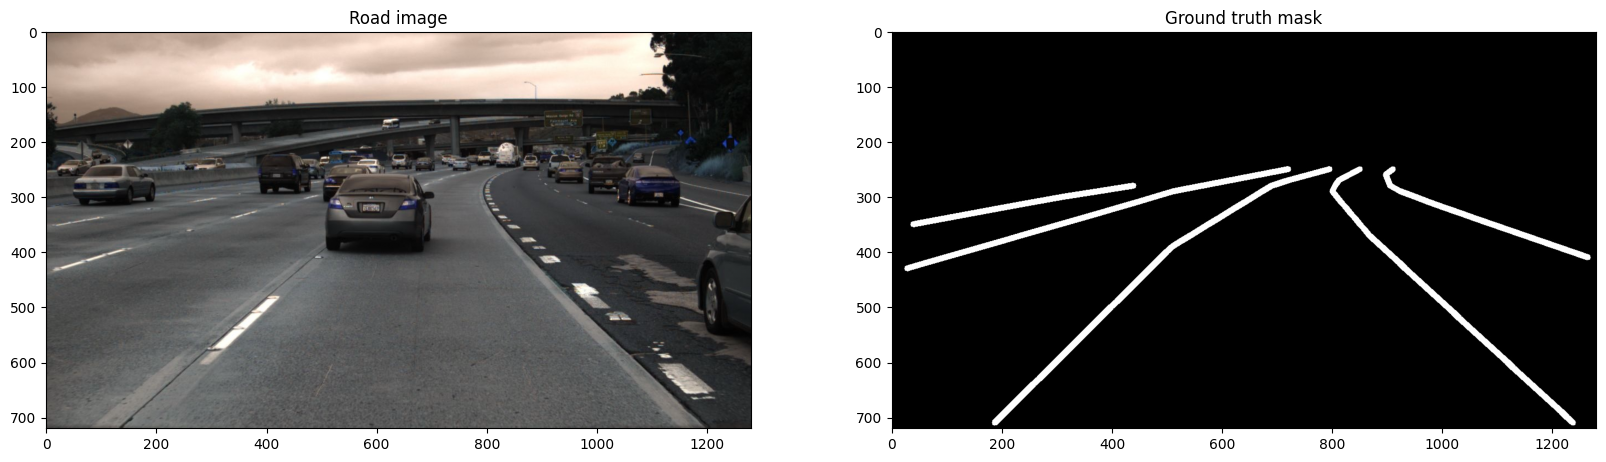

In [12]:
# visualize an example image and its corresponding lane mask
img_mask = cv2.imread('C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/training/lane-masks/0601_1494452841891933527.jpg')
img_color = cv2.imread('C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/training/frames/0601_1494452841891933527.jpg')

# training set
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.imshow(img_color/255.)
plt.title('Road image')

plt.subplot(1, 2, 2)
plt.imshow(img_mask/255., cmap='gray')
plt.title('Ground truth mask')



plt.show()

In [50]:
!cd tusimple_preprocessed && mkdir testing
!cd tusimple_preprocessed/testing && mkdir frames && mkdir lane-masks

A subdirectory or file testing already exists.
A subdirectory or file frames already exists.


In [51]:
'''
In 'clips' directory, we get the 20th frame from each video clip
and copy the image/frame to a new directory of which path is assigned to the variable 'new_frames' below.
'''
clips = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_set/clips'
new_frames = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/testing/frames'




for i in os.listdir(clips):
    for j in os.listdir(os.path.join(clips, i)):
        # get the 20th 
        
        frame = clips+'/'+i+'/'+j+'/'+'20.jpg'
        # os.path.join(clips, i, j, '20.jpg')
        print(frame)
        '''
            create a new name for each frame: here the directories' names
            e.g. 'clips/0531/1492629775931278791/20.jpg' becomes  '0531_1492629775931278791.jpg'
        '''
        tmp = frame[:-7].split('/')[-2:]
        new_fn = f'{tmp[0]}_{tmp[1]}.jpg'
        new_file = os.path.join(new_frames, new_fn)
        shutil.copy(frame, new_file)
    print('Done with: ', i)

C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_set/clips/0530/1492626047222176976_0/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_set/clips/0530/1492626126171818168_0/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_set/clips/0530/1492626127172745520_0/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_set/clips/0530/1492626153155598528_0/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_set/clips/0530/1492626155156451704_0/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_set/clips/0530/1492626158152981904_0/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_set/clips/0530/1492626166147797438_0/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_set/clips/0530/1492626171146236124_0/20.jpg
C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSim

In [52]:
# load the datasets: json files: label data files
df_0601 = pd.read_json('C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/TUSimple/test_label.json', lines=True)

df = pd.concat([df_0601])

In [53]:
# generate masks based on the json files above
for index, row in df.iterrows():
    # generate the lane mask for each frame
    generate_lane_mask(row,training_set=False)
    if index%200 == 0:
        print('Row: ', index)

clips/0530/1492626760788443246_0/20.jpg
['0530', '1492626760788443246_0']
0530_1492626760788443246_0.jpg
['0530', '1492626760788443246_0']
0530_1492626760788443246_0.jpg
['0530', '1492626760788443246_0']
0530_1492626760788443246_0.jpg
['0530', '1492626760788443246_0']
0530_1492626760788443246_0.jpg
Row:  0
clips/0530/1492627171538356342_0/20.jpg
['0530', '1492627171538356342_0']
0530_1492627171538356342_0.jpg
['0530', '1492627171538356342_0']
0530_1492627171538356342_0.jpg
['0530', '1492627171538356342_0']
0530_1492627171538356342_0.jpg
['0530', '1492627171538356342_0']
0530_1492627171538356342_0.jpg
clips/0530/1492627288467128445_0/20.jpg
['0530', '1492627288467128445_0']
0530_1492627288467128445_0.jpg
['0530', '1492627288467128445_0']
0530_1492627288467128445_0.jpg
['0530', '1492627288467128445_0']
0530_1492627288467128445_0.jpg
['0530', '1492627288467128445_0']
0530_1492627288467128445_0.jpg
clips/0530/1492626397007603377_0/20.jpg
['0530', '1492626397007603377_0']
0530_1492626397007

In [54]:
# check if we have the same image-mask pairs in the training set
images_path = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/testing/lane-masks'
masks_path = 'C:/Users/azhar/OneDrive/Desktop/DL lab/data/lane detection/tusimple_preprocessed/testing/frames'
assert os.listdir(images_path) == os.listdir(masks_path)